# Example 3: Finding Hidden Signals (Latent Dimensionality)

This notebook demonstrates how to use `NeuralMI` to estimate the **latent dimensionality** of a high-dimensional dataset, such as a recording from many neurons.

**Goal:**
1.  Introduce the concept of "Internal Information" ($I(X_A; X_B)$).
2.  Use `run(mode='dimensionality')` to automate this analysis.
3.  Generate data with a known `latent_dim` and see if we can recover it.

## 1. Imports

In [1]:
import torch
import numpy as np
import neural_mi as nmi
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

## 2. Generating Data with a Known Latent Structure

We'll use `generate_nonlinear_from_latent` to create a 50-dimensional dataset that is secretly driven by a 4-dimensional signal. Our goal is to recover this true dimensionality of 4. 

The raw data of shape `(n_samples, observed_dim)` must be transposed to `(observed_dim, n_samples)` to be used by the processor, where `observed_dim` is treated as the number of channels.

In [13]:
# --- Dataset Parameters ---
n_samples = 10000
true_latent_dim = 3      # The ground truth we want to recover
observed_dim = 50        # The number of "neurons" we observe
mi_between_latents = 3.0 # Strength of correlation in the latent space

# --- Generate Raw 2D Data ---
x_raw, _ = nmi.datasets.generate_nonlinear_from_latent(
    n_samples=n_samples, 
    latent_dim=true_latent_dim,
    observed_dim=observed_dim,
    mi=mi_between_latents
)

# Transpose from (samples, channels) to (channels, samples/timepoints)
x_raw_transposed = x_raw.T

print(f"Transposed X data shape: {x_raw_transposed.shape}")

Transposed X data shape: torch.Size([50, 10000])


## 3. Running the Dimensionality Analysis

The key idea is to see how the Internal Information changes as we vary the capacity of our MI model, which we do by sweeping over the `embedding_dim`. We expect the MI to plateau once `embedding_dim` is large enough to capture the true latent dimensionality. The location of this "elbow" is our estimate.

`run(mode='dimensionality')` automates this entire process.

In [14]:
# Base parameters for the trainer
base_params = {
    'n_epochs': 50, 'learning_rate': 1e-3, 'batch_size': 128,
    'patience': 5, 'hidden_dim': 128, 'n_layers': 3
}

# The sweep_grid MUST contain 'embedding_dim' for this mode
sweep_grid = {
    'embedding_dim': [1, 2, 3, 4, 5, 6, 8, 10, 12, 16, 20]
}

# Run the analysis directly on the transposed raw data
dim_results = nmi.run(
    x_data=x_raw_transposed,
    mode='dimensionality',
    processor_type='continuous',
    processor_params={'window_size': 1},
    base_params=base_params,
    sweep_grid=sweep_grid,
    n_splits=10, # Average over 5 random channel splits
    # n_workers=4,
    random_seed=42
)

display(dim_results.dataframe.head())

2025-10-03 17:57:33 - neural_mi - INFO - --- Running Split 1/10 ---
2025-10-03 17:57:33 - neural_mi - INFO - Starting parameter sweep with 12 workers...


Parameter Sweep Progress:   0%|          | 0/11 [00:00<?, ?task/s]

2025-10-03 17:57:48 - neural_mi - INFO - Parameter sweep finished.
2025-10-03 17:57:48 - neural_mi - INFO - --- Running Split 2/10 ---
2025-10-03 17:57:48 - neural_mi - INFO - Starting parameter sweep with 12 workers...


Parameter Sweep Progress:   0%|          | 0/11 [00:00<?, ?task/s]

2025-10-03 17:58:04 - neural_mi - INFO - Parameter sweep finished.
2025-10-03 17:58:04 - neural_mi - INFO - --- Running Split 3/10 ---
2025-10-03 17:58:04 - neural_mi - INFO - Starting parameter sweep with 12 workers...


Parameter Sweep Progress:   0%|          | 0/11 [00:00<?, ?task/s]

2025-10-03 17:58:18 - neural_mi - INFO - Parameter sweep finished.
2025-10-03 17:58:18 - neural_mi - INFO - --- Running Split 4/10 ---
2025-10-03 17:58:18 - neural_mi - INFO - Starting parameter sweep with 12 workers...


Parameter Sweep Progress:   0%|          | 0/11 [00:00<?, ?task/s]

Run f6ebbe20-8257-4d62-ac2c-a17d153179b2_c6 | MI: 9.247:  54%|█████▍    | 27/50 [00:05<00:02,  8.52it/s] 

2025-10-03 17:58:28 - neural_mi - INFO - Parameter sweep finished.
2025-10-03 17:58:28 - neural_mi - INFO - --- Running Split 5/10 ---
2025-10-03 17:58:28 - neural_mi - INFO - Starting parameter sweep with 12 workers...


Parameter Sweep Progress:   0%|          | 0/11 [00:00<?, ?task/s]

Run 9eff591c-a1dd-479e-87cd-a03b1095c456_c0 | MI: 1.422:  54%|█████▍    | 27/50 [00:05<00:02,  8.63it/s]   

2025-10-03 17:58:38 - neural_mi - INFO - Parameter sweep finished.
2025-10-03 17:58:38 - neural_mi - INFO - --- Running Split 6/10 ---
2025-10-03 17:58:38 - neural_mi - INFO - Starting parameter sweep with 12 workers...


Parameter Sweep Progress:   0%|          | 0/11 [00:00<?, ?task/s]

Run 204cef28-fbbc-4952-82c4-3059985d24dd_c1 | MI: 5.001:  76%|███████▌  | 38/50 [00:06<00:01, 11.62it/s] 

2025-10-03 17:58:49 - neural_mi - INFO - Parameter sweep finished.
2025-10-03 17:58:49 - neural_mi - INFO - --- Running Split 7/10 ---
2025-10-03 17:58:49 - neural_mi - INFO - Starting parameter sweep with 12 workers...


Parameter Sweep Progress:   0%|          | 0/11 [00:00<?, ?task/s]

2025-10-03 17:59:01 - neural_mi - INFO - Parameter sweep finished.
2025-10-03 17:59:01 - neural_mi - INFO - --- Running Split 8/10 ---
2025-10-03 17:59:01 - neural_mi - INFO - Starting parameter sweep with 12 workers...


Parameter Sweep Progress:   0%|          | 0/11 [00:00<?, ?task/s]

2025-10-03 17:59:12 - neural_mi - INFO - Parameter sweep finished.
2025-10-03 17:59:12 - neural_mi - INFO - --- Running Split 9/10 ---
2025-10-03 17:59:12 - neural_mi - INFO - Starting parameter sweep with 12 workers...


Parameter Sweep Progress:   0%|          | 0/11 [00:00<?, ?task/s]

2025-10-03 17:59:24 - neural_mi - INFO - Parameter sweep finished.
2025-10-03 17:59:24 - neural_mi - INFO - --- Running Split 10/10 ---
2025-10-03 17:59:24 - neural_mi - INFO - Starting parameter sweep with 12 workers...


Parameter Sweep Progress:   0%|          | 0/11 [00:00<?, ?task/s]

2025-10-03 17:59:36 - neural_mi - INFO - Parameter sweep finished.
2025-10-03 17:59:36 - neural_mi - INFO - --- Dimensionality Analysis Complete ---


,embedding_dim,mi_mean,mi_std
0,1,1.529738,0.062835
1,2,5.082230,0.151619
2,3,8.072457,0.368571
3,4,9.354871,0.394955
4,5,9.439930,0.148353


## 4. Visualizing and Interpreting the Saturation Curve

The output `Results` object automatically calculates the estimated dimensionality, which we can access from the `details` attribute. We can then use the built-in `.plot()` method to visualize the result.

True Latent Dimension: 3
Estimated Latent Dimensions: {0.1: 10, 1.0: 5, 15.0: 3}


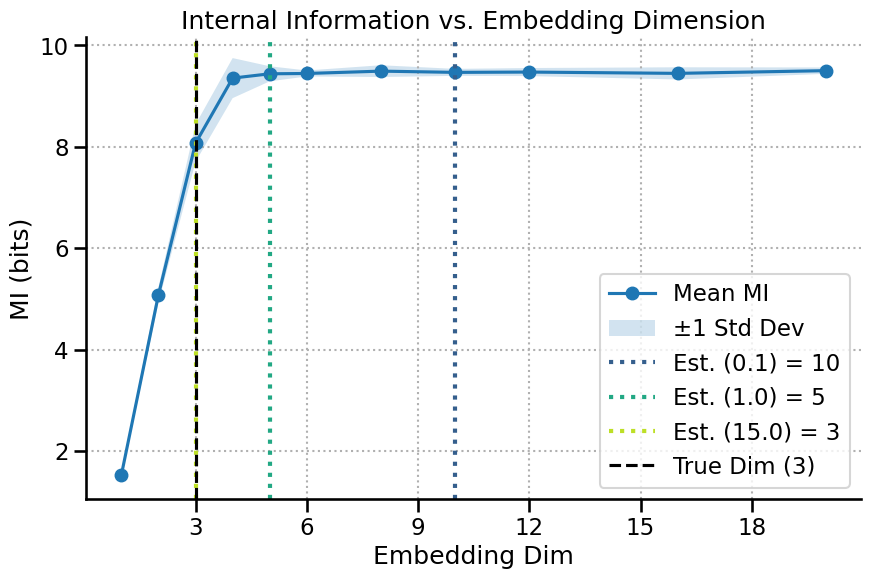

In [16]:
# The estimated dimensions are now in the .details attribute
estimated_dims = dim_results.details['estimated_dims']
print(f"True Latent Dimension: {true_latent_dim}")
print(f"Estimated Latent Dimensions: {estimated_dims}")

# Use the built-in plot method and add annotations
ax = dim_results.plot(show=False, estimated_values=estimated_dims)

ax.axvline(x=true_latent_dim, color='black', linestyle='--', label=f'True Dim ({true_latent_dim})')
ax.set_title('Internal Information vs. Embedding Dimension')
ax.legend()
plt.show()

## 5. Conclusion

The result is fantastic! The plot clearly shows the MI estimate rising steadily and then flattening out right around the true latent dimension of 4. The automated dimensionality estimation successfully identifies this elbow.

This demonstrates a powerful exploratory capability of the `NeuralMI` library for analyzing the intrinsic complexity of high-dimensional neural recordings.